In [1]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
import pandas as pd
import numpy as np
import glob,os
from tqdm.auto import tqdm
import math
import sklearn
from sklearn.linear_model import LinearRegression

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite.models import Models, Prediction
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb

/work/FAC/FGSE/IDYST/tbeucler/default/saranya/miniconda3/envs/unil_tigramite/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/work/FAC/FGSE/IDYST/tbeucler/default/saranya/miniconda3/envs/unil_tigramite/lib/python3.8/site-packages/tigramite/models.py:29: UserWarning: [Errno 2] No such file or directory: '/work/FAC/FGSE/IDYST/tbeucler/default/saranya/miniconda3/envs/unil_tigramite/lib/python3.8/site-packages/tigramite/../versions.py'
  warnings.warn(str(e))
/work/FAC/FGSE/IDYST/tbeucler/default/saranya/miniconda3/envs/unil_tigramite/lib/python3.8/site-packages/tigramite/plotting.py:26: UserWarning: [Errno 2] No such file or directory: '/work/FAC/FGSE/IDYST/tbeucler/default/saranya/miniconda3/envs/unil_tigramite/lib/python3.8/site-packages/tigramite/../versions.py'
  warnings.warn(str(e))
/work/FAC/FGSE/IDY

In [2]:
def select_links(tau_min, tau_max, parents, children):
    """
    This function selects the causal links that will be tested by
    PCMCI. The links are selected such that per each variable in
    `children` all `parents` are stablished as causes, and no other
    causal relationships exist.
    
    Assumes `parents` and `children` are disjoint sets, and that all
    variables are included in the union of both sets.
    
    Parameters
    ----------
    tau_min : int
        Minimum time lag to test. Note that zero-lags are undirected.
    tau_max : int
        Maximum time lag. Must be larger or equal to tau_min.
    parents : set of int
        List of variables that will be assigned as a parent link.
        Assumed to be disjoint with children
    children : set of int
        List of variables that will be assigned a link from a parent.
        Assumed to be disjoint with parents
    Returns
    -------
    selected_links: dict
        Dictionary of selected links for Tigramite
        
    """

    parents = set(parents)
    children = set(children)

    selected_links = dict()
    # Set the default as all combinations of the selected variables
    for var in [*children, *parents]:
        if var in children:
            # Children can be caused only by parents and by themselves
            selected_links[var] = [
                (parent, -lag)
                for parent in parents
                for lag in range(tau_min, tau_max + 1)
            ]
        else:
            selected_links[var] = []

    return selected_links

def _process_dataset(path=None):
    df1 = pd.read_csv(path,sep=',')
    df1.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
    df1=df1.drop('a', axis=1)
    df1=df1.drop('conv_rrate', axis=1)
    df1=df1.drop('ls_rrate', axis=1)
    df1=df1.drop('mn_conv_prate', axis=1)
    df1=df1.drop('mn_ls_prate', axis=1)
    df1=df1.drop('mn_tot_prate', axis=1)
    df1=df1.drop('outconv_rrate', axis=1)
    df1=df1.drop('outls_rrate', axis=1)
    df1=df1.drop('outmn_conv_prate', axis=1)
    df1=df1.drop('outmn_ls_prate', axis=1)
    df1=df1.drop('outmn_tot_prate', axis=1)
    df1=df1.drop('conv_ppt', axis=1)
    df1=df1.drop('outconv_ppt', axis=1)
    
    TCname = path.split('/')[-1].split('.')[0].split('_')[-1]
    #print(TCname)
    for item in glob.glob('/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/targets/*tot_ppt_int*'):
        if str(TCname) in item:
            d1=pd.read_csv(item)
            d1.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
            d1=d1.drop('a', axis=1)
            dt1=pd.concat([d1,df1],axis=1, join='inner')
        else:
            continue
    return dt1

In [3]:
p1="../timeseries_csv/ts_wp/"
p2="../../targets/"

In [4]:
ds1=_process_dataset(glob.glob(p1+'*2020vongfong*')[0])
ds2=_process_dataset(glob.glob(p1+'*2020chanhom*')[0])
ds3=_process_dataset(glob.glob(p1+'*2020saudel*')[0])
ds4=_process_dataset(glob.glob(p1+'*2020molave*')[0])
ds5=_process_dataset(glob.glob(p1+'*2020goni*')[0])
ds6=_process_dataset(glob.glob(p1+'*2020atsani*')[0])
ds7=_process_dataset(glob.glob(p1+'*2020vamco*')[0])
ds8=_process_dataset(glob.glob(p1+'*2019neoguri*')[0])
ds9=_process_dataset(glob.glob(p1+'*2019bualoi*')[0])
ds10=_process_dataset(glob.glob(p1+'*2019halong*')[0])
ds11=_process_dataset(glob.glob(p1+'*2019nakri*')[0])
ds12=_process_dataset(glob.glob(p1+'*2019fengshen*')[0])
ds13=_process_dataset(glob.glob(p1+'*2019kalmaegi*')[0])
ds14=_process_dataset(glob.glob(p1+'*2019fungwong*')[0])
ds15=_process_dataset(glob.glob(p1+'*2019kammuri*')[0])
ds16=_process_dataset(glob.glob(p1+'*2018jelawat*')[0])
ds17=_process_dataset(glob.glob(p1+'*2018maliksi*')[0])
ds18=_process_dataset(glob.glob(p1+'*2018kongrey*')[0])
ds19=_process_dataset(glob.glob(p1+'*2018yutu*')[0])
ds20=_process_dataset(glob.glob(p1+'*2017muifa*')[0])
ds21=_process_dataset(glob.glob(p1+'*2017lan*')[0])
ds22=_process_dataset(glob.glob(p1+'*2017haikul*')[0])
ds23=_process_dataset(glob.glob(p1+'*2016megi*')[0])
ds24=_process_dataset(glob.glob(p1+'*2016sarika*')[0])
ds25=_process_dataset(glob.glob(p1+'*2016haima*')[0])
ds26=_process_dataset(glob.glob(p1+'*2015maysak*')[0])
ds27=_process_dataset(glob.glob(p1+'*2015koppu*')[0])
ds28=_process_dataset(glob.glob(p1+'*2015infa*')[0])
ds29=_process_dataset(glob.glob(p1+'*2014tapah*')[0])
ds30=_process_dataset(glob.glob(p1+'*2014nuri*')[0])
ds31=_process_dataset(glob.glob(p1+'*2014hagupit*')[0])
ds32=_process_dataset(glob.glob(p1+'*2013yagi*')[0])
ds33=_process_dataset(glob.glob(p1+'*2013fitow*')[0])
ds34=_process_dataset(glob.glob(p1+'*2013danas*')[0])
ds35=_process_dataset(glob.glob(p1+'*2013francisco*')[0])
ds36=_process_dataset(glob.glob(p1+'*2013krosa*')[0])
ds37=_process_dataset(glob.glob(p1+'*2013haiyan*')[0])
ds38=_process_dataset(glob.glob(p1+'*2012guchol*')[0])
ds39=_process_dataset(glob.glob(p1+'*2012gaemi*')[0])
ds40=_process_dataset(glob.glob(p1+'*2012maria*')[0])
ds41=_process_dataset(glob.glob(p1+'*2012sontinh*')[0])
ds42=_process_dataset(glob.glob(p1+'*2012bopha*')[0])
ds43=_process_dataset(glob.glob(p1+'*2011songda*')[0])
ds44=_process_dataset(glob.glob(p1+'*2011haima*')[0])
ds45=_process_dataset(glob.glob(p1+'*2011nalgae*')[0])
ds46=_process_dataset(glob.glob(p1+'*2011washi*')[0])


In [5]:
ds47=_process_dataset(glob.glob(p1+'*2010OMAIS*')[0])
ds48=_process_dataset(glob.glob(p1+'*2010CONSON*')[0])
ds49=_process_dataset(glob.glob(p1+'*2010CHANTHU*')[0])
ds50=_process_dataset(glob.glob(p1+'*2010DIANMU*')[0])
ds51=_process_dataset(glob.glob(p1+'*2010LIONROCK*')[0])
ds52=_process_dataset(glob.glob(p1+'*2010MALOU*')[0])
ds53=_process_dataset(glob.glob(p1+'*2010FANAPI*')[0])
ds54=_process_dataset(glob.glob(p1+'*2010MALAKAS*')[0])
ds55=_process_dataset(glob.glob(p1+'*2010MEGI*')[0])
ds56=_process_dataset(glob.glob(p1+'*2010CHABA*')[0])
ds57=_process_dataset(glob.glob(p1+'*2010OMEKA*')[0])
ds58=_process_dataset(glob.glob(p1+'*2009KUJIRA*')[0])
ds59=_process_dataset(glob.glob(p1+'*2009CHAN-HOM*')[0])
ds60=_process_dataset(glob.glob(p1+'*2009LINFA*')[0])
ds61=_process_dataset(glob.glob(p1+'*2009MORAKOT*')[0])
ds62=_process_dataset(glob.glob(p1+'*2009ETAU*')[0])
ds63=_process_dataset(glob.glob(p1+'*2009VAMCO*')[0])
ds64=_process_dataset(glob.glob(p1+'*2009KROVANH*')[0])
ds65=_process_dataset(glob.glob(p1+'*2009DUJUAN*')[0])
ds66=_process_dataset(glob.glob(p1+'*2009CHOI-WAN*')[0])
ds67=_process_dataset(glob.glob(p1+'*2009PARMA*')[0])
ds68=_process_dataset(glob.glob(p1+'*2009MELOR*')[0])
ds69=_process_dataset(glob.glob(p1+'*2009LUPIT*')[0])
ds70=_process_dataset(glob.glob(p1+'*2009MIRINAE*')[0])
ds71=_process_dataset(glob.glob(p1+'*2009NIDA*')[0])
ds72=_process_dataset(glob.glob(p1+'*2008NEOGURI*')[0])
ds73=_process_dataset(glob.glob(p1+'*2008RAMMASUN*')[0])
ds74=_process_dataset(glob.glob(p1+'*2008NAKRI*')[0])
ds75=_process_dataset(glob.glob(p1+'*2008FENGSHEN*')[0])
ds76=_process_dataset(glob.glob(p1+'*2008KALMAEGI*')[0])
ds77=_process_dataset(glob.glob(p1+'*2008FUNG-WONG*')[0])
ds78=_process_dataset(glob.glob(p1+'*2008VONGFONG*')[0])
ds79=_process_dataset(glob.glob(p1+'*2008NURI*')[0])
ds80=_process_dataset(glob.glob(p1+'*2008SINLAKU*')[0])
ds81=_process_dataset(glob.glob(p1+'*2008HAGUPIT*')[0])
ds82=_process_dataset(glob.glob(p1+'*2008JANGMI*')[0])
ds83=_process_dataset(glob.glob(p1+'*2008HIGOS*')[0])
ds84=_process_dataset(glob.glob(p1+'*2008MAYSAK*')[0])
ds85=_process_dataset(glob.glob(p1+'*2008DOLPHIN*')[0])
ds86=_process_dataset(glob.glob(p1+'*2007KONG-REY*')[0])
ds87=_process_dataset(glob.glob(p1+'*2007MAN-YI*')[0])
ds88=_process_dataset(glob.glob(p1+'*2007USAGI*')[0])
ds89=_process_dataset(glob.glob(p1+'*2007PABUK*')[0])
ds90=_process_dataset(glob.glob(p1+'*2007SEPAT*')[0])
ds91=_process_dataset(glob.glob(p1+'*2007FITOW*')[0])
ds92=_process_dataset(glob.glob(p1+'*2007DANAS*')[0])
ds93=_process_dataset(glob.glob(p1+'*2007NARI*')[0])
ds94=_process_dataset(glob.glob(p1+'*2007WIPHA*')[0])
ds95=_process_dataset(glob.glob(p1+'*2007LEKIMA*')[0])
ds96=_process_dataset(glob.glob(p1+'*2007KROSA*')[0])
ds97=_process_dataset(glob.glob(p1+'*2007LINGLING*')[0])
ds98=_process_dataset(glob.glob(p1+'*2007PEIPAH*')[0])
ds99=_process_dataset(glob.glob(p1+'*2007HAGIBIS*')[0])
ds100=_process_dataset(glob.glob(p1+'*2007MITAG*')[0])
ds101=_process_dataset(glob.glob(p1+'*2006CHANCHU*')[0])
ds102=_process_dataset(glob.glob(p1+'*2006EWINIAR*')[0])
ds103=_process_dataset(glob.glob(p1+'*2006BILIS*')[0])
ds104=_process_dataset(glob.glob(p1+'*2006KAEMI*')[0])
ds105=_process_dataset(glob.glob(p1+'*2006PRAPIROON*')[0])
ds106=_process_dataset(glob.glob(p1+'*2006SAOMAI*')[0])
ds107=_process_dataset(glob.glob(p1+'*2006WUKONG*')[0])
ds108=_process_dataset(glob.glob(p1+'*2006IOKE*')[0])
ds109=_process_dataset(glob.glob(p1+'*2006SHANSHAN*')[0])
ds110=_process_dataset(glob.glob(p1+'*2006MUKDA*')[0])
ds111=_process_dataset(glob.glob(p1+'*2006XANGSANE*')[0])
ds112=_process_dataset(glob.glob(p1+'*2006BEBINCA*')[0])
ds113=_process_dataset(glob.glob(p1+'*2006SOULIK*')[0])
ds114=_process_dataset(glob.glob(p1+'*2006CIMARON*')[0])
ds115=_process_dataset(glob.glob(p1+'*2006CHEBI*')[0])
ds116=_process_dataset(glob.glob(p1+'*2006DURIAN*')[0])
ds117=_process_dataset(glob.glob(p1+'*2006UTOR*')[0])
ds118=_process_dataset(glob.glob(p1+'*2005KULAP*')[0])
ds119=_process_dataset(glob.glob(p1+'*2005ROKE*')[0])
ds120=_process_dataset(glob.glob(p1+'*2005SONCA*')[0])
ds121=_process_dataset(glob.glob(p1+'*2005HAITANG*')[0])
ds122=_process_dataset(glob.glob(p1+'*2005NALGAE*')[0])
ds123=_process_dataset(glob.glob(p1+'*2005BANYAN*')[0])
ds124=_process_dataset(glob.glob(p1+'*2005MATSA*')[0])
ds125=_process_dataset(glob.glob(p1+'*2005GUCHOL*')[0])
ds126=_process_dataset(glob.glob(p1+'*2005MAWAR*')[0])
ds127=_process_dataset(glob.glob(p1+'*2005TALIM*')[0])
ds128=_process_dataset(glob.glob(p1+'*2005NABI*')[0])
ds129=_process_dataset(glob.glob(p1+'*2005KHANUN*')[0])
ds130=_process_dataset(glob.glob(p1+'*2005DAMREY*')[0])
ds131=_process_dataset(glob.glob(p1+'*2005SAOLA*')[0])
ds132=_process_dataset(glob.glob(p1+'*2005LONGWANG*')[0])
ds133=_process_dataset(glob.glob(p1+'*2005KIROGI*')[0])
ds134=_process_dataset(glob.glob(p1+'*2005TEMBIN*')[0])
ds135=_process_dataset(glob.glob(p1+'*2005BOLAVEN*')[0])
ds136=_process_dataset(glob.glob(p1+'*2004SUDAL*')[0])
ds137=_process_dataset(glob.glob(p1+'*2004NIDA*')[0])
ds138=_process_dataset(glob.glob(p1+'*2004CHANTHU*')[0])
ds139=_process_dataset(glob.glob(p1+'*2004DIANMU*')[0])
ds140=_process_dataset(glob.glob(p1+'*2004MINDULLE*')[0])




In [6]:
ds141=_process_dataset(glob.glob(p1+'*2004TINGTING*')[0])
ds142=_process_dataset(glob.glob(p1+'*2004NAMTHEUN*')[0])
ds143=_process_dataset(glob.glob(p1+'*2004MERANTI*')[0])
ds144=_process_dataset(glob.glob(p1+'*2004RANANIM*')[0])
ds145=_process_dataset(glob.glob(p1+'*2004MEGI*')[0])
ds146=_process_dataset(glob.glob(p1+'*2004CHABA*')[0])
ds147=_process_dataset(glob.glob(p1+'*2004AERE*')[0])
ds148=_process_dataset(glob.glob(p1+'*2004SONGDA*')[0])
ds149=_process_dataset(glob.glob(p1+'*2004MEARI*')[0])
ds150=_process_dataset(glob.glob(p1+'*2004MA-ON*')[0])
ds151=_process_dataset(glob.glob(p1+'*2004TOKAGE*')[0])
ds152=_process_dataset(glob.glob(p1+'*2004NOCK-TEN*')[0])
ds153=_process_dataset(glob.glob(p1+'*2004MUIFA*')[0])
ds154=_process_dataset(glob.glob(p1+'*2004NANMADOL*')[0])
ds155=_process_dataset(glob.glob(p1+'*2004NORU*')[0])
ds156=_process_dataset(glob.glob(p1+'*2003SOUDELOR*')[0])
ds157=_process_dataset(glob.glob(p1+'*2003KUJIRA*')[0])
ds158=_process_dataset(glob.glob(p1+'*2003CHAN-HOM*')[0])
ds159=_process_dataset(glob.glob(p1+'*2003IMBUDO*')[0])
ds160=_process_dataset(glob.glob(p1+'*2003NANGKA*')[0])
ds161=_process_dataset(glob.glob(p1+'*2003KONI*')[0])
ds162=_process_dataset(glob.glob(p1+'*2003ETAU*')[0])
ds163=_process_dataset(glob.glob(p1+'*2003KROVANH*')[0])
ds164=_process_dataset(glob.glob(p1+'*2003DUJUAN*')[0])
ds165=_process_dataset(glob.glob(p1+'*2003MAEMI*')[0])
ds166=_process_dataset(glob.glob(p1+'*2003CHOI-WAN*')[0])
ds167=_process_dataset(glob.glob(p1+'*2003KOPPU*')[0])
ds168=_process_dataset(glob.glob(p1+'*2003KETSANA*')[0])
ds169=_process_dataset(glob.glob(p1+'*2003MELOR*')[0])
ds170=_process_dataset(glob.glob(p1+'*2003NEPARTAK*')[0])
ds171=_process_dataset(glob.glob(p1+'*2003LUPIT*')[0])
ds172=_process_dataset(glob.glob(p1+'*2002MITAG*')[0])
ds173=_process_dataset(glob.glob(p1+'*2002HAGIBIS*')[0])
ds174=_process_dataset(glob.glob(p1+'*2002CHATAAN*')[0])
ds175=_process_dataset(glob.glob(p1+'*2002RAMMASUN*')[0])
ds176=_process_dataset(glob.glob(p1+'*2002HALONG*')[0])
ds177=_process_dataset(glob.glob(p1+'*2002FENGSHEN*')[0])
ds178=_process_dataset(glob.glob(p1+'*2002FUNG-WONG*')[0])
ds179=_process_dataset(glob.glob(p1+'*2002PHANFONE*')[0])
ds180=_process_dataset(glob.glob(p1+'*2002RUSA*')[0])
ds181=_process_dataset(glob.glob(p1+'*2002ELE*')[0])
ds182=_process_dataset(glob.glob(p1+'*2002SINLAKU*')[0])
ds183=_process_dataset(glob.glob(p1+'*2002HAGUPIT*')[0])
ds184=_process_dataset(glob.glob(p1+'*2002MEKKHALA*')[0])
ds185=_process_dataset(glob.glob(p1+'*2002HIGOS*')[0])
ds186=_process_dataset(glob.glob(p1+'*2002BAVI*')[0])
ds187=_process_dataset(glob.glob(p1+'*2002HUKO*')[0])
ds188=_process_dataset(glob.glob(p1+'*2002HAISHEN*')[0])
ds189=_process_dataset(glob.glob(p1+'*2002PONGSONA*')[0])
ds190=_process_dataset(glob.glob(p1+'*2001CIMARON*')[0])
ds191=_process_dataset(glob.glob(p1+'*2001CHEBI*')[0])
ds192=_process_dataset(glob.glob(p1+'*2001UTOR*')[0])
ds193=_process_dataset(glob.glob(p1+'*2001KONG-REY*')[0])
ds194=_process_dataset(glob.glob(p1+'*2001FRANCISCO*')[0])
ds195=_process_dataset(glob.glob(p1+'*2001MAN-YI*')[0])
ds196=_process_dataset(glob.glob(p1+'*2001PABUK*')[0])
ds197=_process_dataset(glob.glob(p1+'*2001WUTIP*')[0])
ds198=_process_dataset(glob.glob(p1+'*2001FITOW*')[0])
ds199=_process_dataset(glob.glob(p1+'*2001NARI*')[0])
ds200=_process_dataset(glob.glob(p1+'*2001VIPA*')[0])
ds201=_process_dataset(glob.glob(p1+'*2001FRANCISCO*')[0])
ds202=_process_dataset(glob.glob(p1+'*2001LEKIMA*')[0])
ds203=_process_dataset(glob.glob(p1+'*2001KROSA*')[0])
ds204=_process_dataset(glob.glob(p1+'*2001HAIYAN*')[0])
ds205=_process_dataset(glob.glob(p1+'*2001PODUL*')[0])
ds206=_process_dataset(glob.glob(p1+'*2001LINGLING*')[0])
ds207=_process_dataset(glob.glob(p1+'*2001FAXAI*')[0])

In [7]:
tcwp1=ds1.values
tcwp2=ds2.values
tcwp3=ds3.values
tcwp4=ds4.values
tcwp5=ds5.values
tcwp6=ds6.values
tcwp7=ds7.values
tcwp8=ds8.values
tcwp9=ds9.values
tcwp10=ds10.values
tcwp11=ds11.values
tcwp12=ds12.values
tcwp13=ds13.values
tcwp14=ds14.values
tcwp15=ds15.values
tcwp16=ds16.values
tcwp17=ds17.values
tcwp18=ds18.values
tcwp19=ds19.values
tcwp20=ds20.values
tcwp21=ds21.values
tcwp22=ds22.values
tcwp23=ds23.values
tcwp24=ds24.values
tcwp25=ds25.values
tcwp26=ds26.values
tcwp27=ds27.values
tcwp28=ds28.values
tcwp29=ds29.values
tcwp30=ds30.values
tcwp31=ds31.values
tcwp32=ds32.values
tcwp33=ds33.values
tcwp34=ds34.values
tcwp35=ds35.values
tcwp36=ds36.values
tcwp37=ds37.values
tcwp38=ds38.values
tcwp39=ds39.values
tcwp40=ds40.values
tcwp41=ds41.values
tcwp42=ds42.values
tcwp43=ds43.values
tcwp44=ds44.values
tcwp45=ds45.values
tcwp46=ds46.values
tcwp47=ds47.values
tcwp48=ds48.values
tcwp49=ds49.values
tcwp50=ds50.values

In [8]:
tcwp51=ds51.values
tcwp52=ds52.values
tcwp53=ds53.values
tcwp54=ds54.values
tcwp55=ds55.values
tcwp56=ds56.values
tcwp57=ds57.values
tcwp58=ds58.values
tcwp59=ds59.values
tcwp60=ds60.values
tcwp61=ds61.values
tcwp62=ds62.values
tcwp63=ds63.values
tcwp64=ds64.values
tcwp65=ds65.values
tcwp66=ds66.values
tcwp67=ds67.values
tcwp68=ds68.values
tcwp69=ds69.values
tcwp70=ds70.values
tcwp71=ds71.values
tcwp72=ds72.values
tcwp73=ds73.values
tcwp74=ds74.values
tcwp75=ds75.values
tcwp76=ds76.values
tcwp77=ds77.values
tcwp78=ds78.values
tcwp79=ds79.values
tcwp80=ds80.values
tcwp81=ds81.values
tcwp82=ds82.values
tcwp83=ds83.values
tcwp84=ds84.values
tcwp85=ds85.values
tcwp86=ds86.values
tcwp87=ds87.values
tcwp88=ds88.values
tcwp89=ds89.values
tcwp90=ds90.values
tcwp91=ds91.values
tcwp92=ds92.values
tcwp93=ds93.values
tcwp94=ds94.values
tcwp95=ds95.values
tcwp96=ds96.values
tcwp97=ds97.values
tcwp98=ds98.values
tcwp99=ds99.values
tcwp100=ds100.values

In [9]:
tcwp101=ds101.values
tcwp102=ds102.values
tcwp103=ds103.values
tcwp104=ds104.values
tcwp105=ds105.values
tcwp106=ds106.values
tcwp107=ds107.values
tcwp108=ds108.values
tcwp109=ds109.values
tcwp110=ds110.values
tcwp111=ds111.values
tcwp112=ds112.values
tcwp113=ds113.values
tcwp114=ds114.values
tcwp115=ds115.values
tcwp116=ds116.values
tcwp117=ds117.values
tcwp118=ds118.values
tcwp119=ds119.values
tcwp120=ds120.values
tcwp121=ds121.values
tcwp122=ds122.values
tcwp123=ds123.values
tcwp124=ds124.values
tcwp125=ds125.values
tcwp126=ds126.values
tcwp127=ds127.values
tcwp128=ds128.values
tcwp129=ds129.values
tcwp130=ds130.values
tcwp131=ds131.values
tcwp132=ds132.values
tcwp133=ds133.values
tcwp134=ds134.values
tcwp135=ds135.values
tcwp136=ds136.values
tcwp137=ds137.values
tcwp138=ds138.values
tcwp139=ds139.values
tcwp140=ds140.values
tcwp141=ds141.values
tcwp142=ds142.values
tcwp143=ds143.values
tcwp144=ds144.values
tcwp145=ds145.values
tcwp146=ds146.values
tcwp147=ds147.values
tcwp148=ds148.values
tcwp149=ds149.values
tcwp150=ds150.values

In [10]:
tcwp151=ds151.values
tcwp152=ds152.values
tcwp153=ds153.values
tcwp154=ds154.values
tcwp155=ds155.values
tcwp156=ds156.values
tcwp157=ds157.values
tcwp158=ds158.values
tcwp159=ds159.values
tcwp160=ds160.values
tcwp161=ds161.values
tcwp162=ds162.values
tcwp163=ds163.values
tcwp164=ds164.values
tcwp165=ds165.values
tcwp166=ds166.values
tcwp167=ds167.values
tcwp168=ds168.values
tcwp169=ds169.values
tcwp170=ds170.values
tcwp171=ds171.values
tcwp172=ds172.values
tcwp173=ds173.values
tcwp174=ds174.values
tcwp175=ds175.values
tcwp176=ds176.values
tcwp177=ds177.values
tcwp178=ds178.values
tcwp179=ds179.values
tcwp180=ds180.values
tcwp181=ds181.values
tcwp182=ds182.values
tcwp183=ds183.values
tcwp184=ds184.values
tcwp185=ds185.values
tcwp186=ds186.values
tcwp187=ds187.values
tcwp188=ds188.values
tcwp189=ds189.values
tcwp190=ds190.values
tcwp191=ds191.values
tcwp192=ds192.values
tcwp193=ds193.values
tcwp194=ds194.values
tcwp195=ds195.values
tcwp196=ds196.values
tcwp197=ds197.values
tcwp198=ds198.values
tcwp199=ds199.values
tcwp200=ds200.values
tcwp201=ds201.values
tcwp202=ds202.values
tcwp203=ds203.values
tcwp204=ds204.values
tcwp205=ds205.values
tcwp206=ds206.values
tcwp207=ds207.values

West Pacific Storms

In [11]:
#tcwp1 tcwp20

In [11]:
from scipy.ndimage import gaussian_filter1d

In [12]:
ddwp={'cyclone2':tcwp2,'cyclone3':tcwp3,'cyclone4':tcwp4,'cyclone5':tcwp5,'cyclone6':tcwp6,
      'cyclone7':tcwp7, 'cyclone8':tcwp8,'cyclone9':tcwp9,'cyclone10':tcwp10,'cyclone11':tcwp11,'cyclone12':tcwp12,
      'cyclone13':tcwp13,'cyclone14':tcwp14,'cyclone15':tcwp15,'cyclone16':tcwp16,'cyclone17':tcwp17,
      'cyclone18':tcwp18,'cyclone19':tcwp19,'cyclone21':tcwp21,'cyclone22':tcwp22,'cyclone23':tcwp23,'cyclone24':tcwp24,
      'cyclone25':tcwp25,'cyclone26':tcwp26,'cyclone27':tcwp27,'cyclone28':tcwp28,'cyclone29':tcwp29,'cyclone30':tcwp30,
      'cyclone31':tcwp31,'cyclone32':tcwp32,'cyclone33':tcwp33,'cyclone34':tcwp34,'cyclone35':tcwp35,'cyclone36':tcwp36,
      'cyclone37':tcwp37,'cyclone38':tcwp38,'cyclone39':tcwp39,'cyclone40':tcwp40,'cyclone41':tcwp41,'cyclone42':tcwp42,
      'cyclone43':tcwp43,'cyclone44':tcwp44,'cyclone45':tcwp45,'cyclone46':tcwp46,'cyclone47':tcwp47,'cyclone48':tcwp48,
      'cyclone49':tcwp49,'cyclone50':tcwp50,'cyclone51':tcwp51,
      'cyclone52':tcwp52, 'cyclone53':tcwp53,'cyclone54':tcwp54,'cyclone55':tcwp55,'cyclone56':tcwp56,'cyclone57':tcwp57,
      'cyclone58':tcwp58,'cyclone59':tcwp59,'cyclone60':tcwp60,'cyclone61':tcwp61,'cyclone62':tcwp62,'cyclone63':tcwp63,
      'cyclone64':tcwp64,'cyclone65':tcwp65,'cyclone66':tcwp66,'cyclone67':tcwp67,'cyclone68':tcwp68,'cyclone69':tcwp69,
      'cyclone70':tcwp70,'cyclone71':tcwp71,'cyclone72':tcwp72,'cyclone73':tcwp73,'cyclone74':tcwp74,'cyclone75':tcwp75,
      'cyclone76':tcwp76,'cyclone77':tcwp77,'cyclone78':tcwp78,'cyclone79':tcwp79,'cyclone80':tcwp80,'cyclone81':tcwp81,
      'cyclone82':tcwp82,'cyclone83':tcwp83,'cyclone84':tcwp84,'cyclone85':tcwp85,'cyclone86':tcwp86,'cyclone87':tcwp87,
      'cyclone88':tcwp88,'cyclone89':tcwp89,'cyclone90':tcwp90,'cyclone91':tcwp91,'cyclone92':tcwp92,'cyclone93':tcwp93,
      'cyclone94':tcwp94,'cyclone95':tcwp95,'cyclone96':tcwp96,'cyclone97':tcwp97,'cyclone98':tcwp98,
      'cyclone99':tcwp99,'cyclone100':tcwp100,'cyclone101':tcwp101,'cyclone102':tcwp102,'cyclone103':tcwp103,'cyclone104':tcwp104,
      'cyclone105':tcwp105,'cyclone106':tcwp106,'cyclone107':tcwp107,'cyclone108':tcwp108,'cyclone109':tcwp109,
      'cyclone110':tcwp110,'cyclone111':tcwp111,'cyclone112':tcwp112,'cyclone113':tcwp113,'cyclone114':tcwp114,
      'cyclone115':tcwp115,'cyclone116':tcwp116,'cyclone117':tcwp117,'cyclone118':tcwp118,'cyclone119':tcwp119,
      'cyclone120':tcwp120,'cyclone121':tcwp121,'cyclone122':tcwp122,'cyclone123':tcwp123,'cyclone124':tcwp124,
      'cyclone125':tcwp125,'cyclone126':tcwp126,'cyclone127':tcwp127,'cyclone128':tcwp128,'cyclone129':tcwp129,
      'cyclone130':tcwp130,'cyclone131':tcwp131,'cyclone132':tcwp132,'cyclone133':tcwp133,'cyclone134':tcwp134,
      'cyclone135':tcwp135,'cyclone136':tcwp136,'cyclone137':tcwp137,'cyclone138':tcwp138,'cyclone139':tcwp139,
      'cyclone140':tcwp140,'cyclone141':tcwp141,'cyclone142':tcwp142,'cyclone143':tcwp143,'cyclone144':tcwp144,
      'cyclone145':tcwp145,'cyclone146':tcwp146,'cyclone147':tcwp147,'cyclone148':tcwp148,'cyclone149':tcwp149,'cyclone150':tcwp150,
      'cyclone151':tcwp151,'cyclone152':tcwp152,'cyclone153':tcwp153,'cyclone154':tcwp154,'cyclone155':tcwp155,
      'cyclone156':tcwp156,'cyclone157':tcwp157,'cyclone158':tcwp158,'cyclone159':tcwp159,'cyclone160':tcwp160,
      'cyclone161':tcwp161,'cyclone162':tcwp162,'cyclone163':tcwp163,'cyclone164':tcwp164,'cyclone165':tcwp165,
      'cyclone166':tcwp166,'cyclone167':tcwp167,'cyclone168':tcwp168,'cyclone169':tcwp169,'cyclone170':tcwp170,
      'cyclone171':tcwp171,'cyclone172':tcwp172,'cyclone173':tcwp173,'cyclone174':tcwp174,'cyclone175':tcwp175,
      'cyclone176':tcwp176,'cyclone177':tcwp177,'cyclone178':tcwp178,'cyclone179':tcwp179,'cyclone180':tcwp180,
      'cyclone181':tcwp181,'cyclone182':tcwp182,'cyclone183':tcwp183,'cyclone184':tcwp184,'cyclone185':tcwp185,
      'cyclone186':tcwp186,'cyclone187':tcwp187,'cyclone188':tcwp188,'cyclone189':tcwp189,'cyclone190':tcwp190,
      'cyclone191':tcwp191,'cyclone192':tcwp192,'cyclone193':tcwp193,'cyclone194':tcwp194,'cyclone195':tcwp195,
      'cyclone196':tcwp196,'cylone197':tcwp197,'cyclone198':tcwp198,'cyclone199':tcwp199,'cyclone200':tcwp200,
      'cyclone201':tcwp201,'cyclone202':tcwp202,'cyclone203':tcwp203,'cyclone204':tcwp204,'cyclone205':tcwp205,
      'cyclone206':tcwp206,'cyclone207':tcwp207}

In [14]:
len(ddwp)

205

In [13]:
newddwp = {}
for inte,item in enumerate(ddwp.keys()):
    newddwp[inte] = ddwp[item]
    
indices = {}
for ind,varnames in enumerate(newddwp.keys()):
    indices[varnames] = np.argmin(gaussian_filter1d(newddwp[varnames][:,1],3))

In [14]:
def nan_to_999(dictionary=None):
    newdict = {}
    for name in dictionary.keys():
        newdict[name] = np.nan_to_num(dictionary[name].copy(),-999)
    newdict2 = {}
    for name in newdict.keys():
        temp = newdict[name].copy()
        temp[temp==0] = -999.
        newdict2[name] = temp
    return newdict2

def align_data(refpoint=71,individualpoint=None,data=None):
    newtraincyclone2 = np.zeros((data.shape[0]+(refpoint-individualpoint),data.shape[1]))
    for i in range((data.shape[1])):
        newtraincyclone2[:,i] = np.concatenate([np.ones((refpoint-individualpoint))*(-999.),data[:,i]])
    return newtraincyclone2

def do_alignnedd(newddwp=None,indices=indices,stopindex=None):
    aligned_newddwp = {}
    for intt,obj in enumerate(newddwp.keys()):
        if stopindex:
            aligned_newddwp[obj] = align_data(np.asarray(list(indices.values())).max(),indices[obj],newddwp[obj])[:,:stopindex]
        else:
            aligned_newddwp[obj] = align_data(np.asarray(list(indices.values())).max(),indices[obj],newddwp[obj])
    return aligned_newddwp

def do_num_to_nan(data=None):
    newdata = {}
    for intt,obj in enumerate(data.keys()):
        temp = data[obj].copy()
        temp[temp==-999.] = np.nan
        newdata[obj] = temp
    return newdata

In [15]:
class Pipeline:
    """
    Tigramite and Linear Regression Pipeline
    """
    def __init__(self,data,pc_alpha,alpha_level,pc_type='run_pcstable' or 'pcmci',tau_min0=None,tau_max0=None,
                 target='precip',var_name=None,seed=None,cond_ind_test=ParCorr()):#,parents=None):
        self.pc_alpha = pc_alpha
        self.alpha_level = alpha_level
        self.data = data
        self.pc_type = pc_type
        self.target = target
        self.tau_min0 = tau_min0
        self.tau_max0 = tau_max0
        self.var_name = var_name
        self.seed = seed
        self.cond_ind_test = cond_ind_test
        #self.parent=parents
        
    #################################################################################
    # Step 0: Split
    #################################################################################
    def splitdata(self,testindex=None):
        datae = self.data.copy()
        traindata = {}
        testdata = {}
        validdata = {}
        validindex,newtestindex = testindex[:int(len(testindex)/2)],testindex[int(len(testindex)/2):]
        for obj in datae.keys():
            #number = int(obj[7:])
            number = (obj)
            if number in list(newtestindex):
                #testdata['cyclone'+str(number)] = datae['cyclone'+str(number)]
                testdata[str(number)] = datae[(number)]
            elif number in list(validindex):
                #validdata['cyclone'+str(number)] = datae['cyclone'+str(number)]
                validdata[str(number)] = datae[(number)]
            else:
                #traindata['cyclone'+str(number)] = datae['cyclone'+str(number)]
                traindata[str(number)] = datae[(number)]
        return traindata,validdata,testdata
    
    #################################################################################
    # Step 1: Tigramite
    #################################################################################
    def run_tigramite(self,lengthtrain=None):
        #assert len(self.data)==lengthtrain,"Wrong shape!"
        datae = self.data.copy()
        dataframe =  pp.DataFrame(datae,analysis_mode ='multiple', var_names=var_names,missing_flag=-999.)
        #################################################################################
        # Sel links
        #################################################################################
        for member in dataframe.values.keys():
            children = [0,1,2]
            parents = np.arange(0,234)
            #parents = np.arange(0,self.parent)
            sel_links = select_links(self.tau_min0, self.tau_max0, parents, children)
        #################################################################################
        # Run Tigramite
        #################################################################################        
        pcmci = PCMCI(dataframe = dataframe, cond_ind_test = self.cond_ind_test)
        if self.pc_type=='run_pcstable':
            results = pcmci.run_pc_stable(selected_links=sel_links, tau_min=self.tau_min0, tau_max=self.tau_max0,\
                                          pc_alpha=self.pc_alpha)
        elif self.pc_type=='pcmci':
            results = pcmci.run_pcmci(selected_links=sel_links, tau_min=self.tau_min0, tau_max=self.tau_max0,\
                                      pc_alpha=self.pc_alpha)

        pcmci.verbosity = 2
        #################################################################################
        # Test
        #################################################################################   
        #pcmci.print_results(results,self.alpha_level)
        #pcmci.print_significant_links(p_matrix=results['p_matrix'],
        #val_matrix = results['val_matrix'],
        #alpha_level = self.alpha_level)
        return results
    
    #################################################################################
    # Step 2: Linear Regression
    #################################################################################
    # Helper functions
    #################################################################################
    def random_testindex(self,totalexp=None,testexp=None):
        from numpy.random import default_rng
        rng = default_rng(self.seed)
        seed = rng.choice(totalexp, testexp, replace=False)
        return seed
    
    def extract_lag_info(self,datar=None,varindex=None,lag=None):
        temp = datar[:,varindex] # Full time series
        store = []
        for timeindex in range(len(temp)):
            if timeindex < np.abs(lag):
                store.append(np.nan)
            elif timeindex > len(temp)-1-np.abs(lag):
                store.append(np.nan)
            else:
                store.append(temp[timeindex-np.abs(lag)])
        return store
    
    def extract_var_and_lag(self,pcmci_results=None,p_or_q='p' or 'q'):
        datae = self.data.copy()
        dataframe =  pp.DataFrame(datae,analysis_mode ='multiple', var_names=var_names,missing_flag=-999.)
        pcmci = PCMCI(dataframe = dataframe, cond_ind_test = self.cond_ind_test)
        #################################################################################
        # Sel links
        #################################################################################
        for member in dataframe.values.keys():
            children = [0,1,2]
            parents = np.arange(0,234)
            #parents = np.arange(0,self.parent)
            sel_links = select_links(self.tau_min0, self.tau_max0, parents, children)
        
        q_matrix = pcmci.get_corrected_pvalues(p_matrix=pcmci_results['p_matrix'],
                                               selected_links = sel_links, 
                                               tau_min=self.tau_min0,tau_max=self.tau_max0, fdr_method='fdr_bh')
        #################################################################################
        # Save vars and lags
        #################################################################################
        if p_or_q=='p':
            sig_links = (pcmci_results['p_matrix'].copy() <= self.alpha_level)
        elif p_or_q=='q':
            sig_links = (q_matrix.copy() <= self.alpha_level)
        arr = []
        for j in range(3):
            links = {(p[0], -p[1]): np.abs(pcmci_results['val_matrix'][p[0],j,abs(p[1])]) for p in zip(*np.where(sig_links[:,j,:]))}
            # Sort by value
            sorted_links = sorted(links, key=links.get, reverse=True)
            arr.append(sorted_links)
        return arr
    
    #################################################################################
    # Process functions
    #################################################################################
    def preproc_ts_withnan(self,links=None,group=None,trainmean=None,trainstd=None):
        if self.target=='precip':
            arrtarget,ytarget = links[0],[self.data[obj][:,0] for obj in self.data.keys()]
        elif self.target=='pmin':
            arrtarget,ytarget = links[1],[self.data[obj][:,1] for obj in self.data.keys()]
        elif self.target=='v10':
            arrtarget,ytarget = links[2],[self.data[obj][:,2] for obj in self.data.keys()]
        
        # 1. Extract time series with nan
        varindexstore,lagstore,TS_store,flatTS_store = [],[],[],[]
        for varindex,lag in arrtarget:
            varindexstore.append(varindex)
            lagstore.append(lag)
            tempp = [self.extract_lag_info(datar=self.data[obj],varindex=varindex,lag=lag) for obj in self.data.keys()]
            TS_store.append(tempp)
            flatTS_store.append(np.concatenate([obj for obj in tempp]))
        
        # 2. Normalize
        if group=='train':
            TSnorml_store,meanstore,stdstore = [],[],[]
            for i in range(len(TS_store)): #combination
                tempmean,tempstd = np.nanmean(flatTS_store[i]),np.nanstd(flatTS_store[i])
                TSnorml_store.append([(obj-tempmean)/tempstd for obj in TS_store[i]])
                meanstore.append(tempmean)
                stdstore.append(tempstd)
        elif (group=='test') or (group=='valid'):
            TSnorml_store = []
            for i in range(len(TS_store)):
                tempmean,tempstd = (trainmean[i]),(trainstd[i])
                TSnorml_store.append([(obj-tempmean)/tempstd for obj in TS_store[i]])
            
        # 3. Concatenate
        #validindex,testindex = validtestindex[0:int(np.round(len(validtestindex)/2))],\
        #validtestindex[int(np.round(len(validtestindex)/2)):]
        
        Xtrain_withnan_store = []
        for i in range(len(TS_store)):
            storelist = [i for j, i in enumerate(TSnorml_store[i])]
            Xtrain_withnan_store.append(np.concatenate([obj for obj in storelist]))
            
        Ytrain = np.concatenate([i for j, i in enumerate(ytarget)])
        if group=='train':
            return Xtrain_withnan_store,Ytrain,meanstore,stdstore
        elif group=='valid':
            return Xtrain_withnan_store,Ytrain
        elif group=='test':
            return Xtrain_withnan_store,Ytrain
    
    def remove_nan(self,Xdict=None,ydict=None):
        def _remove_nan(X=None,y=None):
            X_nonan,Y_nonan = [],[]
            X_withnan_storer = np.asarray(X).transpose()
            for i in (range(len(y))):
                tempX = X_withnan_storer[i,:]
                if np.isnan(tempX).any():
                    continue
                else:
                    X_nonan.append(tempX)
                    Y_nonan.append(y[i])
            return X_nonan,Y_nonan
        Xtrain,ytrain = _remove_nan(X=Xdict['train'],y=ydict['train'])
        Xvalid,yvalid = _remove_nan(X=Xdict['valid'],y=ydict['valid'])
        Xtest,ytest = _remove_nan(X=Xdict['test'],y=ydict['test'])
        return {'train':Xtrain,'valid':Xvalid,'test':Xtest},{'train':ytrain,'valid':yvalid,'test':ytest}

    def remove_999(self,Xdict=None,ydict=None):
        def _remove_999(X=None,y=None):
            X_nonan,Y_nonan = [],[]
            X_withnan_storer = np.asarray(X).transpose()
            for i in (range(len(y))):
                tempX = X_withnan_storer[i,:]
                if y[i]==-999.:
                    continue
                else:
                    X_nonan.append(tempX)
                    Y_nonan.append(y[i])
            return X_nonan,Y_nonan
        Xtrain,ytrain = _remove_999(X=Xdict['train'],y=ydict['train'])
        Xvalid,yvalid = _remove_999(X=Xdict['valid'],y=ydict['valid'])
        Xtest,ytest = _remove_999(X=Xdict['test'],y=ydict['test'])
        return {'train':Xtrain,'valid':Xvalid,'test':Xtest},{'train':ytrain,'valid':yvalid,'test':ytest}
    #################################################################################
    # Train model
    #################################################################################
    def train_mlr(self,X=None,y=None):
        regr = LinearRegression()
        regr.fit(X['train'],y['train'])
        return regr

In [16]:
def trainMLR_target(traindata=None,validdata=None,testdata=None,target='precip' or 'pmin' or 'v10',seed=12345):
    ################################################################################################################
    # 1. X,y with nan
    Xtrain_nan,ytrain_nan,trainmean,trainstd = Pipeline(traindata,pc_alpha,alpha_level,pc_type='pcmci',\
                                                        tau_min0=2,tau_max0=16,\
                                                        target=target,var_name=var_names,\
                                                        seed=seed).preproc_ts_withnan(links=var_and_lag,group='train',\
                                                                                       trainmean=None,trainstd=None)
    Xvalid_nan,yvalid_nan = Pipeline(validdata,pc_alpha,alpha_level,pc_type='pcmci',\
                                   tau_min0=2,tau_max0=16,target=target,\
                                   var_name=var_names,seed=seed).preproc_ts_withnan(links=var_and_lag,\
                                                                                     group='valid',\
                                                                                     trainmean=trainmean,\
                                                                                     trainstd=trainstd)
    
    Xtest_nan,ytest_nan = Pipeline(testdata,pc_alpha,alpha_level,pc_type='pcmci',\
                                   tau_min0=2,tau_max0=16,target=target,\
                                   var_name=var_names,seed=seed).preproc_ts_withnan(links=var_and_lag,\
                                                                                     group='test',\
                                                                                     trainmean=trainmean,\
                                                                                     trainstd=trainstd)
    X_nan = {'train':Xtrain_nan,'valid':Xvalid_nan,'test':Xtest_nan}
    y_nan = {'train':ytrain_nan,'valid':yvalid_nan,'test':ytest_nan}
    ################################################################################################################
    # 2. remove nan
    X_nonan,y_nonan = Pipeline(traindata,pc_alpha,alpha_level,pc_type='pcmci',\
                               tau_min0=2,tau_max0=16,target=target,\
                               var_name=var_names,seed=seed).remove_nan(Xdict=X_nan,ydict=y_nan)
    ################################################################################################################
    # 3. Train MLR
    wpac_mlr = Pipeline(traindata,pc_alpha,alpha_level,pc_type='pcmci',\
                        tau_min0=2,tau_max0=16,target=target,\
                        var_name=var_names,seed=seed).train_mlr(X=X_nonan,y=y_nonan)
    ################################################################################################################
    return wpac_mlr,X_nonan,y_nonan
    #return X_nan, y_nan

import pickle
def save_to_pickle(loc=None,var=None):
    with open(loc,"wb") as f:
        pickle.dump(var,f)
    return None

In [19]:
[3e-1/2,1e-1/2,1e-2/2,1e-3/2,1e-4/2,1e-5/2,1e-6/2,1e-7/2,1e-8/2,1e-9/2]

[0.15, 0.05, 0.005, 0.0005, 5e-05, 5e-06, 5e-07, 5e-08, 5e-09, 5e-10]

#### PCSTABLE

In [17]:
def depickle(loc=None):
    output = []
    with open(loc,'rb') as f:
        output.append(pickle.load(f))
    return output[0]

def align_data(refpoint=71,individualpoint=None,data=None):
    newtraincyclone2 = np.zeros((data.shape[0]+(refpoint-individualpoint),data.shape[1]))
    for i in range((data.shape[1])):
        newtraincyclone2[:,i] = np.concatenate([np.ones((refpoint-individualpoint))*(-999.),data[:,i]])
    return newtraincyclone2

In [18]:
xtest=[np.round(obj,decimals=2) for obj in np.linspace(0.01,0.9,30)]

In [19]:
aligned_newddwp = {}
for intt,obj in enumerate(newddwp.keys()):
    aligned_newddwp[obj] = align_data(np.asarray(list(indices.values())).max(),indices[obj],newddwp[obj])

In [25]:
pc_alphaa,alpha_level,splitsize,seednum=0.1,0.01,55,12348
pc_type = 'run_pcstable'
var_names=ds1.columns.values.tolist()

aligned_newddwp = {}
for intt,obj in enumerate(newddwp.keys()):
    aligned_newddwp[obj] = align_data(np.asarray(list(indices.values())).max(),indices[obj],newddwp[obj])
    
for pc_alpha in tqdm([1e-9]):#[0.09]):#,0.07,0.05,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]):#np.linspace(0.9,0.99,10)):#,0.1,0.05,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]):
    testindex = (Pipeline(aligned_newddwp,pc_alpha,alpha_level,pc_type=pc_type,tau_min0=2,tau_max0=16,\
                          target=None,var_name=var_names,seed=seednum,cond_ind_test=ParCorr()).random_testindex(205,splitsize))
    traindata,validdata,testdata = Pipeline(aligned_newddwp,pc_alpha,alpha_level,pc_type=pc_type,tau_min0=2,tau_max0=16,\
                                            target='precip',var_name=var_names,seed=seednum,cond_ind_test=ParCorr()).splitdata(testindex)
    result,val_min,pval_max = Pipeline(traindata,pc_alpha,alpha_level,pc_type=pc_type,tau_min0=2,tau_max0=16,\
                      target='precip',var_name=var_names,seed=seednum,cond_ind_test=ParCorr()).run_tigramite(int(205-splitsize))
    saveresults = {'result':result,'val_min':val_min,'pval_max':pval_max}
    var_and_lag = [result[0],result[1],result[2]]
    validdata=do_num_to_nan(validdata)
    testdata=do_num_to_nan(testdata)#do_num_to_nan(testdata) 
    #traindatar = nan_to_999(traindata)
    #traindata=np.nan_to_num(traindata,-999.)
    #validdata=np.nan_to_num(validdata,-999.)
    #testdata=np.nan_to_num(testdata,-999.)
    wpac_mlr_precip,X_precip,y_precip = trainMLR_target(traindata=traindata,validdata=validdata,testdata=testdata,target='precip',seed=seednum)
    wpac_mlr_pmin,X_pmin,y_pmin = trainMLR_target(traindata=traindata,validdata=validdata,testdata=testdata,target='pmin',seed=seednum)
    wpac_mlr_v10,X_v10,y_v10 = trainMLR_target(traindata=traindata,validdata=validdata,testdata=testdata,target='v10',seed=seednum)
    #save_to_pickle(loc='./pcstabledata/newcausalwpac_8-24_precip.obj.'+\
    #               str(np.round(pc_alpha,decimals=2))+'.'+str(seednum),\
    #               var={'mlr':wpac_mlr_precip,'X':X_precip,'y':y_precip})
    #
    #save_to_pickle(loc='./pcstabledata/newcausalwpac_8-24_pmin.obj.'+\
    #               str(np.round(pc_alpha,decimals=2))+'.'+str(seednum),\
    #               var={'mlr':wpac_mlr_pmin,'X':X_pmin,'y':y_pmin})
    #save_to_pickle(loc='./pcstabledata/newcausalwpac_8-24_v10.obj.'+\
    #              str(np.round(pc_alpha,decimals=2))+'.'+str(seednum),\
    #               var={'mlr':wpac_mlr_v10,'X':X_v10,'y':y_v10})
    #save_to_pickle(loc='./pcstabledata/newcausalwpac_8-24_lag_and_links.'+\
    #               str(np.round(pc_alpha,decimals=2))+'.'+str(seednum),var=var_and_lag)
    
    #save_to_pickle(loc='./pickleddata4_pcstable/'+str(seednum)+'/causalwpac_precip.obj.'+\
    #               str(np.round(pc_alpha,decimals=2))+'.'+str(seednum),\
    #               var={'mlr':wpac_mlr_precip,'X':X_precip,'y':y_precip})
    #save_to_pickle(loc='./pickleddata4_pcstable/'+str(seednum)+'/causalwpac_pmin.obj.'+\
    #               str(np.round(pc_alpha,decimals=2))+'.'+str(seednum),\
    #               var={'mlr':wpac_mlr_pmin,'X':X_pmin,'y':y_pmin})
    #save_to_pickle(loc='./pickleddata4_pcstable/'+str(seednum)+'/causalwpac_v10.obj.'+\
    #               str(np.round(pc_alpha,decimals=2))+'.'+str(seednum),\
    #               var={'mlr':wpac_mlr_v10,'X':X_v10,'y':y_v10})
    #save_to_pickle(loc='./pickleddata4_pcstable/'+str(seednum)+'/causalwpac_lag_and_links.'+\
    #               str(np.round(pc_alpha,decimals=2))+'.'+str(seednum),var=var_and_lag)
    #save_to_pickle(loc='./pickleddata4_pcstable/'+str(seednum)+'/causalwpac_results.'+\
    #               str(np.round(pc_alpha,decimals=2))+'.'+str(seednum),var=saveresults)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [08:59<00:00, 539.06s/it]


In [24]:
result[1]

defaultdict(dict,
            {0: {(0, -8): 0.32043177964345837,
              (0, -9): -0.04570552150285204,
              (0, -10): -0.02852760978233925,
              (0, -11): -0.01694878518311925,
              (0, -12): -0.009148522663232805,
              (0, -13): -0.004332407687170856,
              (0, -14): -0.0003199351711679066,
              (0, -15): 0.006721302382065607,
              (0, -16): 0.01381803744823494,
              (0, -17): 0.018296932456976164,
              (0, -18): 0.020470304636419002,
              (0, -19): 0.022745565873887177,
              (0, -20): 0.021522675244231654,
              (0, -21): 0.019723685299685233,
              (0, -22): 0.01928710091725319,
              (0, -23): 0.017060542000669258,
              (0, -24): 0.014288901163541427,
              (1, -8): -0.003457817135711614,
              (1, -9): 0.01667913906927913,
              (1, -10): 0.03409266692159803,
              (1, -11): 0.0503417623138116,
              (1, -

In [214]:
np.asarray(X_pmin['test']).shape

(528, 6)

In [16]:
save_to_pickle(loc='./testcausalwpac_precip.obj.'+\
                   str(np.round(0.95,decimals=2))+'.'+str(seednum),\
                   var={'X':xtest})
    

In [22]:
!pwd

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
pwd: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


#### PCMCI

In [20]:
from copy import deepcopy

In [307]:
var_names[27]

'2mtmp'

In [279]:
def trainMLR_target(traindata=None,validdata=None,testdata=None,target='precip' or 'pmin' or 'v10',seed=12345):
    ################################################################################################################
    # 1. X,y with nan
    Xtrain_nan,ytrain_nan,trainmean,trainstd = Pipeline(traindata,pc_alpha,alpha_level,pc_type='pcmci',\
                                                        tau_min0=8,tau_max0=24,\
                                                        target=target,var_name=var_names,\
                                                        seed=seed).preproc_ts_withnan(links=var_and_lag,group='train',\
                                                                                       trainmean=None,trainstd=None)
    Xvalid_nan,yvalid_nan = Pipeline(validdata,pc_alpha,alpha_level,pc_type='pcmci',\
                                   tau_min0=8,tau_max0=24,target=target,\
                                   var_name=var_names,seed=seed).preproc_ts_withnan(links=var_and_lag,\
                                                                                     group='valid',\
                                                                                     trainmean=trainmean,\
                                                                                     trainstd=trainstd)
    
    Xtest_nan,ytest_nan = Pipeline(testdata,pc_alpha,alpha_level,pc_type='pcmci',\
                                   tau_min0=8,tau_max0=24,target=target,\
                                   var_name=var_names,seed=seed).preproc_ts_withnan(links=var_and_lag,\
                                                                                     group='test',\
                                                                                     trainmean=trainmean,\
                                                                                     trainstd=trainstd)
    X_nan = {'train':Xtrain_nan,'valid':Xvalid_nan,'test':Xtest_nan}
    y_nan = {'train':ytrain_nan,'valid':yvalid_nan,'test':ytest_nan}
    ################################################################################################################
    # 2. remove nan
    X_nonan,y_nonan = Pipeline(traindata,pc_alpha,alpha_level,pc_type='pcmci',\
                               tau_min0=8,tau_max0=24,target=target,\
                               var_name=var_names,seed=seed).remove_nan(Xdict=X_nan,ydict=y_nan)
    ################################################################################################################
    # 3. Train MLR
    wpac_mlr = Pipeline(traindata,pc_alpha,alpha_level,pc_type='pcmci',\
                        tau_min0=8,tau_max0=24,target=target,\
                        var_name=var_names,seed=seed).train_mlr(X=X_nonan,y=y_nonan)
    ################################################################################################################
    return wpac_mlr,X_nonan,y_nonan
    #return X_nan, y_nan

In [321]:
pc_alpha,alpha_levellist,splitsize,seednum=0.1,[0.75,0.65,0.55,0.45,0.35,0.25,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02],55,12348 
#0.2,0.15,0.1,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8
    
var_names=ds1.columns.values.tolist()
for pc_alphaa in [0.0000001]:
    for alpha_level in tqdm([1e-9]):
        testindex = (Pipeline(do_alignnedd(newddwp,indices),pc_alphaa,alpha_level,pc_type='pcmci',tau_min0=2,tau_max0=16,\
                              target=None,var_name=var_names,seed=seednum,cond_ind_test=ParCorr()).random_testindex(205,splitsize))
        traindata,validdata,testdata = Pipeline(do_alignnedd(newddwp,indices),pc_alphaa,alpha_level,pc_type='pcmci',tau_min0=2,tau_max0=16,\
                                                target='precip',var_name=var_names,seed=seednum,cond_ind_test=ParCorr()).splitdata(testindex)
        result = Pipeline(traindata,pc_alphaa,alpha_level,pc_type='pcmci',tau_min0=2,tau_max0=16,\
                          target='precip',var_name=var_names,seed=seednum,cond_ind_test=ParCorr()).run_tigramite(int(205-splitsize))
        #_ = Pipeline(validdata,pc_alphaa,alpha_level,pc_type='pcmci',tau_min0=8,tau_max0=24,\
        #                  target='precip',var_name=var_names,seed=seednum,cond_ind_test=ParCorr(),parents=30).run_tigramite(int(205-splitsize))
        #_ = Pipeline(testdata,pc_alphaa,alpha_level,pc_type='pcmci',tau_min0=8,tau_max0=24,\
        #                  target='precip',var_name=var_names,seed=seednum,cond_ind_test=ParCorr(),parents=30).run_tigramite(int(205-splitsize))
        #traindata=np.nan_to_num(traindata,-999.)
        #validdata=np.nan_to_num(validdata,-999.)
        #testdata=np.nan_to_num(testdata,-999.)
        validdata=do_num_to_nan(validdata)
        testdata=do_num_to_nan(testdata)#do_num_to_nan(testdata) 
        traindatar = nan_to_999(traindata)
        var_and_lag = Pipeline(traindatar,pc_alphaa,alpha_level,pc_type='pcmci',tau_min0=8,tau_max0=24,\
                               target='precip',var_name=var_names,seed=seednum,cond_ind_test=ParCorr()).extract_var_and_lag(result,p_or_q='p')
        wpac_mlr_precip,X_precip,y_precip = trainMLR_target(traindata=traindata,validdata=validdata,testdata=testdata,
                                                            target='precip',seed=seednum)
        wpac_mlr_pmin,X_pmin,y_pmin = trainMLR_target(traindata=traindata,validdata=validdata,testdata=testdata,
                                                      target='pmin',seed=seednum)
        wpac_mlr_v10,X_v10,y_v10 = trainMLR_target(traindata=traindata,validdata=validdata,testdata=testdata,
                                                   target='v10',seed=seednum)
    #save_to_pickle(loc='./pickleddatawp/'+str(seednum)+'/causalwpac_precip_8tau24.obj.'+\
    #               str(pc_alpha)+'.'+str(alpha_level)+'.'+str(seednum),\
    #               var={'mlr':wpac_mlr_precip,'X':X_precip,'y':y_precip})
    #save_to_pickle(loc='./pickleddatawp/'+str(seednum)+'/causalwpac_pmin_8tau24.obj.'+\
    #               str(pc_alpha)+'.'+str(alpha_level)+'.'+str(seednum),\
    #               var={'mlr':wpac_mlr_pmin,'X':X_pmin,'y':y_pmin})
    #save_to_pickle(loc='./pickleddatawp/'+str(seednum)+'/causalwpac_v10_8tau24.obj.'+\
    #               str(pc_alpha)+'.'+str(alpha_level)+'.'+str(seednum),\
    #               var={'mlr':wpac_mlr_v10,'X':X_v10,'y':y_v10})
    #save_to_pickle(loc='./pickleddatawp/'+str(seednum)+'/causalwpac_lag_and_links_8tau24.'+\
    #               str(pc_alpha)+'.'+str(alpha_level)+'.'+str(seednum),var=var_and_lag)
    save_to_pickle(loc='./pickleddatawp/'+str(seednum)+'/causalwpac_result_8tau24.'+\
                   str(pc_alpha)+'.'+str(alpha_level)+'.'+str(seednum),var=results)

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [28:55<00:00, 1735.07s/it]


In [225]:
def remove_nan_in_aligned(Xs=None,Ys=None,TYPE='valid'):
    newX,newY = [],[]
    for ind,obj in enumerate(fileobjY[TYPE]):
        if obj==-999.:
            continue
        else:
            newX.append(fileobjX[TYPE][ind])
            newY.append(obj)
    return newX,newY
def remove_999_in_aligned(fileobjX=None,fileobjY=None,TYPE='valid'):
    newX,newY = [],[]
    for ind,obj in enumerate(fileobjY[TYPE]):
        if obj==-999.:
            continue
        else:
            newX.append(fileobjX[TYPE][ind])
            newY.append(obj)
    return newX,newY

def remove_999_in_aligned_orig(fileobjX=None,fileobjY=None):
    newX,newY = [],[]
    for ind,obj in enumerate(fileobjY):
        if obj==-999.:
            continue
        else:
            newX.append(fileobjX[ind])
            newY.append(obj)
    return newX,newY

def _remove_nan(Xdict=None,ydict=None):
    X_nonan,Y_nonan = [],[]
    X_withnan_storer = np.asarray(Xdict).transpose()
    print(X_withnan_storer.shape)
    for i in (range(len(ydict))):
        tempX = X_withnan_storer[i,:]
        if np.isnan(tempX).any():
            continue
        else:
            X_nonan.append(tempX)
            Y_nonan.append(ydict[i])
    return X_nonan,Y_nonan

In [272]:
from copy import deepcopy
validdata2 =  nan_to_999(deepcopy(validdata))
testdata2 =  nan_to_999(deepcopy(testdata))
traindata2 =  nan_to_999(deepcopy(traindatar))


In [273]:
aaaX_nonan,aaaY_nonan = trainMLR_target(traindata=traindata2,validdata=validdata2,testdata=testdata2,
                                                            target='pmin',seed=seednum,var_and_lag=var_and_lag)

In [148]:
testno999X,testno999Y = remove_999_in_aligned(aaaX_nonan,aaaY_nonan,'train')

In [208]:
np.isnan(np.asarray(aaaX_nonan['train']).transpose()[0,:]).any()

True

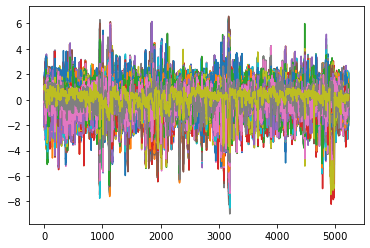

In [324]:
plt.plot(np.asarray(X_pmin['train'])[:])
plt.show()

In [ ]:
save_to_pickle(loc='./pickleddata3/causalwpac_precip.obj.'+str(alpha_level)+'.'+str(seednum),\
               var={'mlr':wpac_mlr_precip,'X':X_precip,'y':y_precip})
save_to_pickle(loc='./pickleddata3/causalwpac_pmin.obj.'+str(alpha_level)+'.'+str(seednum),\
              var={'mlr':wpac_mlr_pmin,'X':X_pmin,'y':y_pmin})
save_to_pickle(loc='./pickleddata3/causalwpac_v10.obj.'+str(alpha_level)+'.'+str(seednum),\
              var={'mlr':wpac_mlr_v10,'X':X_v10,'y':y_v10})
save_to_pickle(loc='./pickleddata3/causalwpac_lag_and_links.'+str(alpha_level),var=var_and_lag)
#save_to_pickle(loc='./pickleddata2/causalwpac_varname',var=var_names)

In [44]:
def nan_to_999(dictionary=None):
    newdict = {}
    for name in dictionary.keys():
        newdict[name] = np.nan_to_num(dictionary[name].copy(),-999)
    newdict2 = {}
    for name in newdict.keys():
        temp = newdict[name].copy()
        temp[temp==0] = -999.
        newdict2[name] = temp
    return newdict2

In [49]:
def rescue_code(function):
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))

In [50]:
rescue_code(save_to_pickle)

In [51]:
def save_to_pickle(loc=None,var=None):
    with open(loc,"wb") as f:
        pickle.dump(var,f)
    return None


In [52]:
def save_to_pickle(loc=None,var=None):
    with open(loc,"wb") as f:
        pickle.dump(var,f)
    return None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


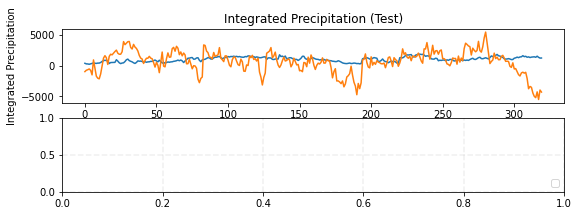

In [25]:
fig,ax = plt.subplots(2,1,figsize=(9,3))
ax[0].plot(y_precip['test'],label='train_truth')
ax[0].plot(wpac_mlr_precip.predict(X_precip['test']),label='train_pred')
ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
plt.legend(loc=4,ncol=2)
plt.grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title('Integrated Precipitation (Test)')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.show()

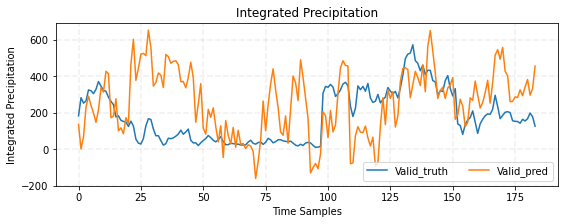

In [194]:
fig,ax = plt.subplots(1,1,figsize=(9,3))
ax.plot(y_nonan['valid'],label='Valid_truth')
ax.plot(wpac_mlr.predict(X_nonan['valid']),label='Valid_pred')
plt.legend(loc=4,ncol=2)
plt.grid(alpha=0.2,lw=1.5,ls='--')
plt.title('Integrated Precipitation')
plt.xlabel('Time Samples')
plt.ylabel('Integrated Precipitation')
plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.show()

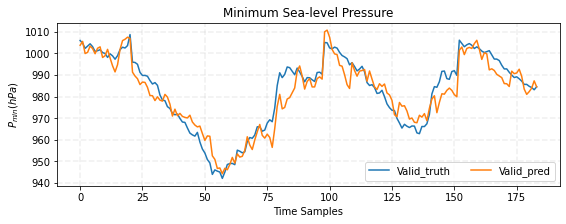

In [196]:
fig,ax = plt.subplots(1,1,figsize=(9,3))
ax.plot(y_pmin['valid'],label='Valid_truth')
ax.plot(wpac_mlr_pmin.predict(X_pmin['valid']),label='Valid_pred')
plt.legend(loc=4,ncol=2)
plt.grid(alpha=0.2,lw=1.5,ls='--')
plt.title('Minimum Sea-level Pressure')
plt.xlabel('Time Samples')
plt.ylabel('${P_{min}} (hPa)$')
plt.savefig('/home/saranya/Downloads/plots_output/pmin_valid.png',dpi=400,facecolor='w')
plt.show()

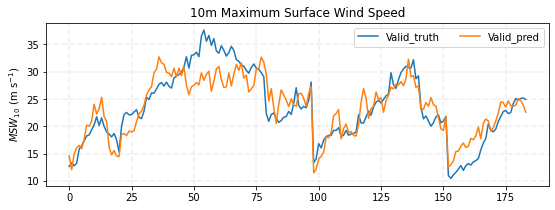

In [197]:
fig,ax = plt.subplots(1,1,figsize=(9,3))
ax.plot(y_v10['valid'],label='Valid_truth')
ax.plot(wpac_mlr_v10.predict(X_v10['valid']),label='Valid_pred')
plt.legend(loc=1,ncol=2)
plt.grid(alpha=0.2,lw=1.5,ls='--')
plt.title('10m Maximum Surface Wind Speed')
plt.ylabel('${MSW_{10}}$ (m s$^{-1}$)')
plt.savefig('/home/saranya/Downloads/plots_output/v10_valid.png',dpi=400,facecolor='w')
plt.show()

North Indian Ocean Storms

In [44]:
from numpy.random import default_rng

rng = default_rng(12345)
seed = rng.choice(48, 10, replace=False)

In [50]:
'cyclone'+str(int(seed[9]))

'cyclone46'

In [46]:
seed

array([13, 35, 18, 28, 27,  9, 31,  8, 32, 46])

In [52]:
data=ddwp.copy()
del data['cyclone'+str(int(seed[0]))]
del data['cyclone'+str(int(seed[1]))]
del data['cyclone'+str(int(seed[2]))]
del data['cyclone'+str(int(seed[3]))]
del data['cyclone'+str(int(seed[4]))]
del data['cyclone'+str(int(seed[5]))]
del data['cyclone'+str(int(seed[6]))]
del data['cyclone'+str(int(seed[7]))]
del data['cyclone'+str(int(seed[8]))]
del data['cyclone'+str(int(seed[9]))]

Extract Variable and lag information

In [59]:
filtvar_lag_dict = {'precip':[obj for obj in arr[0]],\
                    'pmin':[obj for obj in arr[1]],\
                   '10wspd':[obj for obj in arr[2]]}

In [60]:
data['cyclone1'][:(filtvar_lag_dict['precip'][0][1]),156]

array([0.01602166, 0.01646996, 0.0206255 , 0.03346259, 0.04662046,
       0.04634654, 0.02408053, 0.01397228, 0.01491111, 0.02407614,
       0.02368177, 0.03442036, 0.04766599, 0.05906334, 0.08540045,
       0.10599098, 0.12543761, 0.12139301, 0.0737608 , 0.05125052,
       0.02542992, 0.01840909, 0.01610788, 0.01974525, 0.01987464,
       0.01850446, 0.01682129, 0.01493174, 0.01982585, 0.03260581,
       0.02519143, 0.01372967, 0.0116464 , 0.00692698, 0.00378462,
       0.00426407, 0.00904172, 0.00973447, 0.00680046, 0.00681906,
       0.00810528, 0.00646979, 0.00342528, 0.00338809, 0.00384294,
       0.00384591, 0.00236219, 0.00482553, 0.0047624 , 0.00668557,
       0.00624483, 0.00614478, 0.00763378, 0.00917241, 0.0054863 ,
       0.01379989, 0.01314596, 0.01095225, 0.00629012, 0.00626698,
       0.00444031, 0.00707525, 0.0065731 , 0.00863654, 0.0131279 ,
       0.0132541 , 0.01338469, 0.01703943, 0.01457512, 0.02155724,
       0.02453073, 0.03395418, 0.02701791, 0.01891848, 0.02548

In [61]:
# Extract lag info
def extract_lag_info(datar=None,varindex=None,lag=None):
    temp = datar[:,varindex] # Full time series
    store = []
    for timeindex in range(len(temp)):
        if timeindex < np.abs(lag):
            store.append(np.nan)
        elif timeindex > len(temp)-1-np.abs(lag):
            store.append(np.nan)
        else:
            store.append(temp[timeindex-np.abs(lag)])
    return store

In [89]:
varindexstore,lagstore,TS_store,flatTS_store = [],[],[],[]
for varindex,lag in arr[0]:
    varindexstore.append(varindex)
    lagstore.append(lag)
    tempp = [extract_lag_info(datar=ddwp[obj],varindex=varindex,lag=lag) for obj in ddwp.keys()]
    TS_store.append(tempp)
    flatTS_store.append(np.concatenate([obj for obj in tempp]))

In [91]:
TSnorml_store = []
for i in range(len(TS_store)):
    tempmean,tempstd = np.nanmean(flatTS_store[i]),np.nanstd(flatTS_store[i])
    TSnorml_store.append([(obj-tempmean)/tempstd for obj in TS_store[i]])

In [94]:
remove_indices = [13,15]
X_withnan_store, Xtest_withnan_store = [],[]
for i in range(len(TS_store)):
    somelist = [i for j, i in enumerate(TSnorml_store[i]) if j not in remove_indices]
    testlist = [i for j, i in enumerate(TSnorml_store[i]) if j in remove_indices]
    X_withnan_store.append(np.concatenate([obj for obj in somelist]))
    Xtest_withnan_store.append(np.concatenate([obj for obj in testlist]))

In [65]:
#X_withnan_store = []
#for varindex in range(len(TS_store)):
#    tempp = np.concatenate([(obj-np.nanmean(obj))/np.nanstd(obj) for obj in TS_store[varindex]])
#    X_withnan_store.append((tempp-np.nanmean(tempp))/np.nanstd(tempp))

In [110]:
Yall = [ddwp[obj][:,0] for obj in ddwp.keys()]
Ytrain,Ytest = np.concatenate([i for j, i in enumerate(Yall) if j not in remove_indices]),\
np.concatenate([i for j, i in enumerate(Yall) if j in remove_indices])

In [111]:
len(Ytest)

136

In [112]:
X_nonan,Y_nonan = [],[]
X_withnan_storer = np.asarray(X_withnan_store).transpose()
for i in (range(len(Ytrain))):
    tempX = X_withnan_storer[i,:]
    if np.isnan(tempX).any():
        continue
    else:
        X_nonan.append(tempX)
        Y_nonan.append(Ytrain[i])

In [113]:
#TStest_store = []
#for varindex,lag in arr[0]:
#    TStest_store.append(extract_lag_info(datar=ddwp['cyclone13'],varindex=varindex,lag=lag))

#Xtest_withnan_store = []
#for varindex in range(len(TStest_store)):
#    Xtest_withnan_store.append((TStest_store[varindex]-np.nanmean(TStest_store[varindex]))/np.nanstd(TStest_store[varindex]))
X_nonan,Y_nonan = [],[]
X_withnan_storer = np.asarray(X_withnan_store).transpose()
for i in (range(len(Ytrain))):
    tempX = X_withnan_storer[i,:]
    if np.isnan(tempX).any():
        continue
    else:
        X_nonan.append(tempX)
        Y_nonan.append(Ytrain[i])
        

Xtest_nonan,ytest_nonan = [],[]
Xtest_withnan_storer = np.asarray(Xtest_withnan_store).transpose()
for i in (range(len(Ytest))):
    tempX = Xtest_withnan_storer[i,:]
    if np.isnan(tempX).any():
        continue
    else:
        Xtest_nonan.append(tempX)
        ytest_nonan.append(Ytest[i])

In [114]:
np.asarray(Xtest_nonan).shape, np.asarray(X_nonan).shape

((72, 1594), (1805, 1594))

In [115]:
regr = LinearRegression()
regr.fit(X_nonan,Y_nonan)

LinearRegression()

Pipeline for entire timeseries

In [ ]:
class Pipeline:
    """
    Linear Regression Pipeline
    """
    def __init__(self,data,pc_alpha,pc_type='run_pcstable' or 'pcmci',pcmci_results=None,target='precip',seed=None):
        self.pc_alpha = pc_alpha
        self.data = data
        self.pc_type = pc_type
        self.target = target
        self.pcmci_results = pcmci_results
        
    def flatten_array(self,index=None,normalize=True):
        """
        Get concatenated time series
        index: variable index to extract
        """
        if normalize is True:
            temp = np.concatenate([self.data[obj][:,int(self.pcmci_results[self.target][index])] 
                                   for obj in self.data.keys()])
            return (temp-np.nanmean(temp))/np.nanstd(temp)
        else:
            return np.concatenate([self.data[obj][:,int(self.pcmci_results[self.target][index])] 
                                   for obj in self.data.keys()])
    
    def get_INPUTtimeseries(self):
        storeresults = []
        for ind,obj in enumerate(range(len(self.pcmci_results[self.target]))):
            storeresults.append(self.flatten_array(obj,True))
        return np.transpose(np.asarray(storeresults))
    
    def get_OUTPUTtimeseries(self):
        if self.target=='precip':
            return np.concatenate([self.data[obj][:,0] for obj in self.data.keys()])
        elif self.target=='pmin':
            return np.concatenate([self.data[obj][:,1] for obj in self.data.keys()])
        elif self.target=='10wspd':
            return np.concatenate([self.data[obj][:,2] for obj in self.data.keys()])
    
    def fit_transform(self,Xdata=None):
        storeresults = []
        for ind,obj in enumerate(range(len(self.pcmci_results[self.target]))):
            temp = Xdata[:,int(self.pcmci_results[self.target][obj])]
            tempn = (temp-np.nanmean(temp))/np.nanstd(temp)
            storeresults.append(tempn)
        return np.transpose(np.asarray(storeresults))
        
    def fit_model(self,X=None,y=None):
        regr = LinearRegression()
        return regr.fit(X,y)

In [ ]:
Xtest = Pipeline(data,0.05,'pcmci',filtvarindex,'precip').fit_transform(ddwp['cyclone13'])

In [ ]:
Xtrain = Pipeline(data,0.05,'pcmci',filtvarindex,'precip').get_INPUTtimeseries()
ytrain = Pipeline(data,0.05,'pcmci',filtvarindex,'precip').get_OUTPUTtimeseries()

In [ ]:
linrgr_model1 = Pipeline(data,0.05,'pcmci',filtvarindex,'precip').fit_model(Xtrain,ytrain)

In [ ]:
plt.plot(ddwp['cyclone13'][:,0])
plt.plot(linrgr_model1.predict(Xtest))
plt.show()

In [ ]:
linrgr_model1.predict(Xtest)